# Resumen de métricas de PySAD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
pysad = pd.read_csv('PySAD/Resultados/IForestASD_completo.csv')
pysad = pysad.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
iforest = pd.read_csv('PySAD/Resultados/IForestASD_completo.csv',usecols=['Y_pred'])
mad = pd.read_csv('PySAD/Resultados/MAD_completo.csv',usecols=['Y_pred'])
sad = pd.read_csv('PySAD/Resultados/SAD_completo.csv',usecols=['Y_pred'])
xstream = pd.read_csv('PySAD/Resultados/xStream_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
pysad['IForestASD'] = iforest['Y_pred']
pysad['MAD'] = mad['Y_pred']
pysad['SAD'] = sad['Y_pred']
pysad['xStream'] = xstream['Y_pred']

In [5]:
pysad = pysad.set_index('fecha')

In [6]:
pysad.head()

,CurvaCola,scores,IForestASD,MAD,SAD,xStream
fecha,,,,,,
2021-11-26 11:48:00,1,0.398015,0,0,0,0
2021-06-06 19:17:00,0,0.521537,0,1,1,0
2021-12-04 07:59:00,1,0.441599,0,0,0,0
2021-11-06 17:55:00,1,0.719503,0,0,0,0
2021-05-05 08:19:00,0,0.314994,0,0,0,1


## Métricas generales:

In [7]:
anomalias = ['CurvaCola']
metodos = ['IForestASD','MAD','SAD','xStream']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(pysad['CurvaCola'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(pysad['CurvaCola'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(pysad['CurvaCola'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(pysad['CurvaCola'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(pysad['CurvaCola'], pysad[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(pysad['CurvaCola'], pysad[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForestASD,0.511881,0.647309,0.290273,0.025716,0.22078,0.802981
MAD,0.495933,0.720106,0.187867,-0.011516,0.014078,0.977788
SAD,0.495873,0.720086,0.186457,-0.011687,0.013932,0.977815
xStream,0.513001,0.63882,0.290175,0.027432,0.242558,0.783445


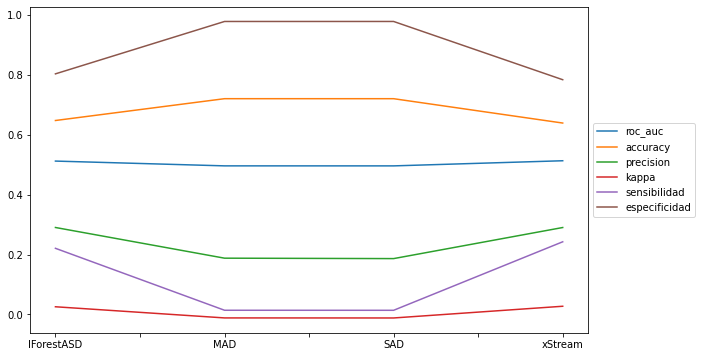

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

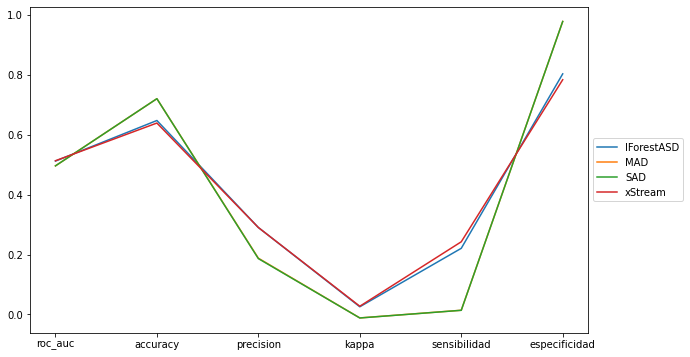

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))